In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = ['SimSong']
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_excel('322058354_按序号_高校学生四六级考试成绩_553_553.xlsx')
data.head()

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,总分,1. 性别,2. 年级,3. 专业类别,...,13. 复习计划执行度（0-5分评分，1=完全不执行 5=完全执行）—指数：,14. 模考分数波动范围（历史波动）,15. 考前焦虑量化表（1=完全放松 5=极度紧张）—1.考试前夕，我常常失眠,2.在考场上，我经常会大脑一片空白,3.我经常担心成绩不好后忧心忡忡,16.学习自我效能感量表（5分评分制，1=完全不能，5=完全可以）—1.我相信通过努力学习，我能通过四/六级考试,2.即使题目很难，我也能冷静应对,3.我有能力我完成考试中的写作任务,17. 您希望预测结果提供,18. 是否同意用于模型训练?
0,1,2025/8/26 8:24:12,162秒,微信,our犯困嫌疑人,220.175.140.205(江西-南昌),22,2,3,5,...,4,2,1,1,1,5,5,5,2,1
1,2,2025/8/26 10:10:57,204秒,手机提交,直接访问,117.24.216.33(福建-泉州),28,1,2,3,...,5,4,3,3,5,3,5,4,3,2
2,3,2025/8/26 10:11:14,314秒,链接,直接访问,111.227.120.77(河北-唐山),12,1,3,2,...,2,2,2,2,1,2,2,1,3,1
3,4,2025/8/26 10:11:32,219秒,链接,直接访问,123.180.170.93(河北-承德),31,1,4,5,...,5,4,5,4,4,5,4,4,3,2
4,5,2025/8/26 10:11:32,166秒,链接,直接访问,222.93.210.166(江苏-苏州),28,1,1,2,...,4,3,4,5,5,3,3,4,4,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 43 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   序号                                                        553 non-null    int64 
 1   提交答卷时间                                                    553 non-null    object
 2   所用时间                                                      553 non-null    object
 3   来源                                                        553 non-null    object
 4   来源详情                                                      347 non-null    object
 5   来自IP                                                      553 non-null    object
 6   总分                                                        553 non-null    int64 
 7   1. 性别                                                     553 non-null    int64 
 8   2. 年级                         

In [5]:
# check missing rate: turns out only 来源详情 has missing 37.25% of data
data.loc[:, data.isna().sum()/len(data) > 0]
missing_rate = data['来源详情'].isna().sum() / len(data)
missing_rate

np.float64(0.37251356238698013)

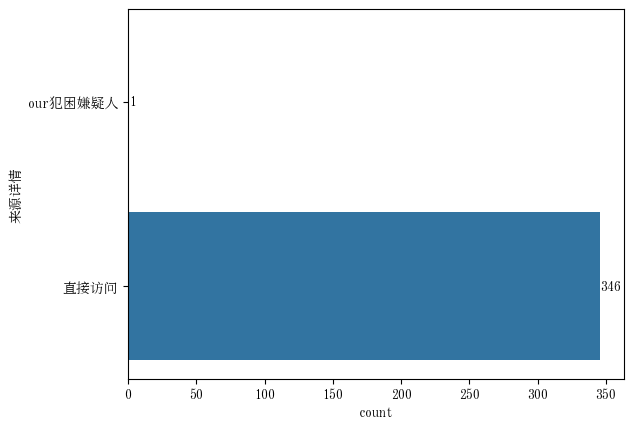

In [6]:
plot = sns.countplot(data['来源详情'])
plot.bar_label(plot.containers[0])
plt.show()

In [7]:
# check if string columns need additional process
data.loc[:, data.dtypes == 'object']

,提交答卷时间,所用时间,来源,来源详情,来自IP
0,2025/8/26 8:24:12,162秒,微信,our犯困嫌疑人,220.175.140.205(江西-南昌)
1,2025/8/26 10:10:57,204秒,手机提交,直接访问,117.24.216.33(福建-泉州)
2,2025/8/26 10:11:14,314秒,链接,直接访问,111.227.120.77(河北-唐山)
3,2025/8/26 10:11:32,219秒,链接,直接访问,123.180.170.93(河北-承德)
4,2025/8/26 10:11:32,166秒,链接,直接访问,222.93.210.166(江苏-苏州)
...,...,...,...,...,...
548,2025/8/26 16:59:48,338秒,链接,直接访问,27.155.197.137(福建-福州)
549,2025/8/26 17:00:02,349秒,微信,NaN,183.130.254.130(浙江-温州)
550,2025/8/26 17:00:02,325秒,手机提交,直接访问,59.56.38.152(福建-福州)
551,2025/8/26 17:00:10,409秒,微信,NaN,59.56.213.115(福建-泉州)


In [8]:
# as the matter of fact that 来源详情 does not seem to provide enough information to uncover insights, so I will decide to drop the column so as others
data.drop(['来源详情', '序号', '来自IP', '提交答卷时间'], axis = 1, inplace=True)
data.columns

Index(['所用时间', '来源', '总分', '1. 性别', '2. 年级', '3. 专业类别',
       '(1)4. 高考英语具体分数 ___/150分  （请尽量准确填写）',
       '5. 考试前最近30天学习行为（请填写具体次数）—完成整套真题:______次', '专项听力训练:______次',
       '写作/翻译练习:______次', 'APP单词学习:______次（如百词斩、扇贝等）', '专项阅读练习:_______次',
       '6. 日均英语学习时长', '7. 常用学习资源(单词APP)', '7 (真题库)', '7 (培训网课)', '7 (英文影视)',
       '7 (外刊阅读)', '7 (其他)', '8. 您已通过的最高英语考试',
       '9. 最近模拟考成绩（如未参加可跳过）（请全部勾选之后在填写成绩，请大致准确填写您最近的成绩）(项目)', '9 (分数)',
       '9 (总分)', '9 (听力)', '9 (阅读)', '9 (写作翻译)', '10. 词汇量自评',
       '(1)11. 最近一学期的大学英语期末成绩 ___/100分', '12.为了确保问卷质量，请本项选择【有时】',
       '13. 复习计划执行度（0-5分评分，1=完全不执行  5=完全执行）—指数：', '14. 模考分数波动范围（历史波动）',
       '15. 考前焦虑量化表（1=完全放松  5=极度紧张）—1.考试前夕，我常常失眠', '2.在考场上，我经常会大脑一片空白',
       '3.我经常担心成绩不好后忧心忡忡',
       '16.学习自我效能感量表（5分评分制，1=完全不能，5=完全可以）—1.我相信通过努力学习，我能通过四/六级考试',
       '2.即使题目很难，我也能冷静应对', '3.我有能力我完成考试中的写作任务', '17. 您希望预测结果提供 ',
       '18. 是否同意用于模型训练?'],
      dtype='object')

In [9]:
# extra seconds from 所用时间 and alter its name and data type
data['所用时间'] = data['所用时间'].str.slice(0, 3).astype('int64')
data.rename(columns={'所用时间': '所用时间（秒）'})

,所用时间（秒）,来源,总分,1. 性别,2. 年级,3. 专业类别,(1)4. 高考英语具体分数 ___/150分 （请尽量准确填写）,5. 考试前最近30天学习行为（请填写具体次数）—完成整套真题:______次,专项听力训练:______次,写作/翻译练习:______次,...,13. 复习计划执行度（0-5分评分，1=完全不执行 5=完全执行）—指数：,14. 模考分数波动范围（历史波动）,15. 考前焦虑量化表（1=完全放松 5=极度紧张）—1.考试前夕，我常常失眠,2.在考场上，我经常会大脑一片空白,3.我经常担心成绩不好后忧心忡忡,16.学习自我效能感量表（5分评分制，1=完全不能，5=完全可以）—1.我相信通过努力学习，我能通过四/六级考试,2.即使题目很难，我也能冷静应对,3.我有能力我完成考试中的写作任务,17. 您希望预测结果提供,18. 是否同意用于模型训练?
0,162,微信,22,2,3,5,115,30,20,20,...,4,2,1,1,1,5,5,5,2,1
1,204,手机提交,28,1,2,3,105,11,8,4,...,5,4,3,3,5,3,5,4,3,2
2,314,链接,12,1,3,2,82,11,9,4,...,2,2,2,2,1,2,2,1,3,1
3,219,链接,31,1,4,5,134,10,1,5,...,5,4,5,4,4,5,4,4,3,2
4,166,链接,28,1,1,2,138,8,1,1,...,4,3,4,5,5,3,3,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,338,链接,12,1,4,2,116,15,10,1,...,1,2,2,2,2,2,2,1,2,2
549,349,微信,27,2,2,5,134,15,9,2,...,5,3,3,5,4,5,4,1,4,2
550,325,手机提交,29,1,2,1,112,11,8,4,...,4,4,5,3,4,5,3,5,3,1
551,409,微信,30,1,2,2,94,15,5,4,...,4,4,4,4,5,5,4,4,4,1


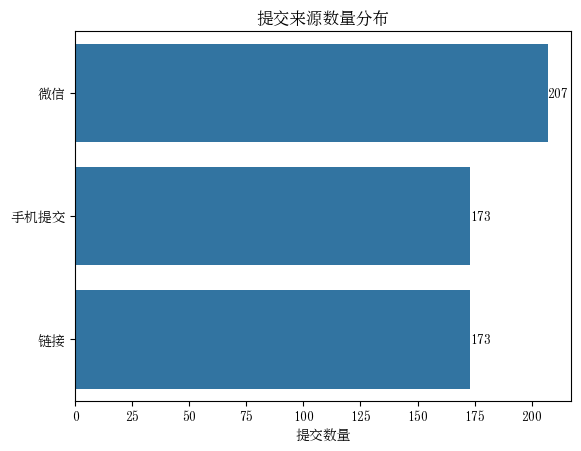

In [10]:
# use countplot instead of barplot that bar_label stats will match vakue_counts

# source_cnt = data['来源'].value_counts().sort_index()
# category = source_cnt.index
# cnt = source_cnt.values

source_plot = sns.countplot(data['来源'])
source_plot.bar_label(source_plot.containers[0])
plt.xlabel('提交数量')
plt.ylabel('')
plt.title('提交来源数量分布')
plt.show()

# print(category)
# print(cnt)


In [11]:
# split data into numerical and categorical version
catrgorical_df = data.loc[:, data.dtypes == 'object']
numerical_df = data.loc[:, data.dtypes != 'object']

<Axes: xlabel='1. 性别', ylabel='总分'>

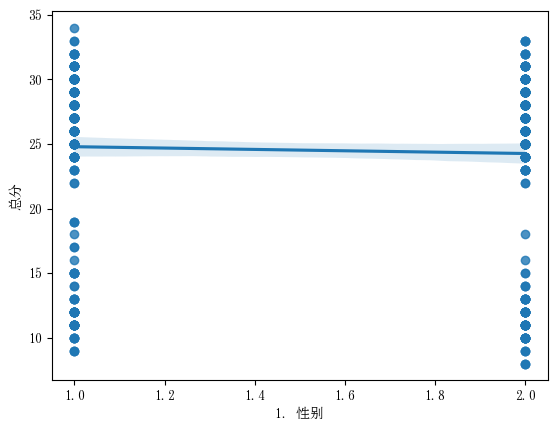

In [12]:
# 性别 VS 总分
sns.regplot(numerical_df, x = '1. 性别', y = '总分')

<Axes: xlabel='3. 专业类别', ylabel='总分'>

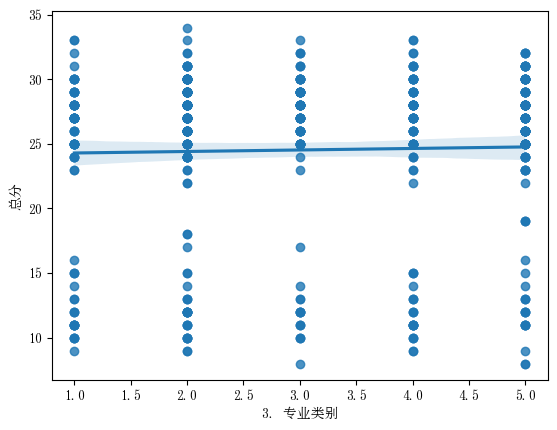

In [13]:
# 专业 VS 总分
sns.regplot(numerical_df, x = '3. 专业类别', y = '总分')


In [14]:
pd.set_option('display.max_columns', None) # show all columns
numerical_df.describe()

,所用时间,总分,1. 性别,2. 年级,3. 专业类别,(1)4. 高考英语具体分数 ___/150分 （请尽量准确填写）,5. 考试前最近30天学习行为（请填写具体次数）—完成整套真题:______次,专项听力训练:______次,写作/翻译练习:______次,APP单词学习:______次（如百词斩、扇贝等）,专项阅读练习:_______次,6. 日均英语学习时长,7. 常用学习资源(单词APP),7 (真题库),7 (培训网课),7 (英文影视),7 (外刊阅读),7 (其他),8. 您已通过的最高英语考试,9. 最近模拟考成绩（如未参加可跳过）（请全部勾选之后在填写成绩，请大致准确填写您最近的成绩）(项目),9 (分数),9 (总分),9 (听力),9 (阅读),9 (写作翻译),10. 词汇量自评,(1)11. 最近一学期的大学英语期末成绩 ___/100分,12.为了确保问卷质量，请本项选择【有时】,13. 复习计划执行度（0-5分评分，1=完全不执行 5=完全执行）—指数：,14. 模考分数波动范围（历史波动）,15. 考前焦虑量化表（1=完全放松 5=极度紧张）—1.考试前夕，我常常失眠,2.在考场上，我经常会大脑一片空白,3.我经常担心成绩不好后忧心忡忡,16.学习自我效能感量表（5分评分制，1=完全不能，5=完全可以）—1.我相信通过努力学习，我能通过四/六级考试,2.即使题目很难，我也能冷静应对,3.我有能力我完成考试中的写作任务,17. 您希望预测结果提供,18. 是否同意用于模型训练?
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.00000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.0,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,280.289331,24.526221,1.500904,2.828210,2.994575,110.533454,9.240506,5.428571,3.003617,15.052441,9.104882,2.891501,0.622061,0.730561,0.401447,0.128391,0.088608,0.077758,2.17179,0.001808,0.001808,0.518987,0.253165,0.405063,0.408680,1.537071,70.654611,3.0,3.497288,3.000000,3.509946,3.450271,3.511754,3.524412,3.502712,3.529837,2.934901,1.564195
std,100.662657,6.565151,0.500452,1.324709,1.382462,18.023718,3.752056,2.976791,1.605015,3.155246,3.764806,0.839999,0.485311,0.444070,0.490635,0.334827,0.284434,0.268032,0.37754,0.042524,0.042524,0.500092,0.435218,0.491349,0.492035,0.877961,11.601398,0.0,1.249816,0.976165,1.257006,1.270401,1.265608,1.253922,1.281308,1.290824,0.920437,0.496311
min,121.000000,8.000000,1.000000,1.000000,1.000000,78.000000,3.000000,1.000000,1.000000,10.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.000000,3.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,187.000000,24.000000,1.000000,2.000000,2.000000,95.000000,6.000000,3.000000,2.000000,12.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,61.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000
50%,314.000000,27.000000,2.000000,3.000000,3.000000,112.000000,9.000000,5.000000,3.000000,15.000000,9.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,71.000000,3.0,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000
75%,375.000000,29.000000,2.000000,4.000000,4.000000,126.000000,12.000000,8.000000,4.000000,18.000000,12.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,81.000000,3.0,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,2.000000
max,440.000000,34.000000,2.000000,5.000000,5.000000,140.000000,30.000000,20.000000,20.000000,30.000000,25.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,90.000000,3.0,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,2.000000


<Axes: >

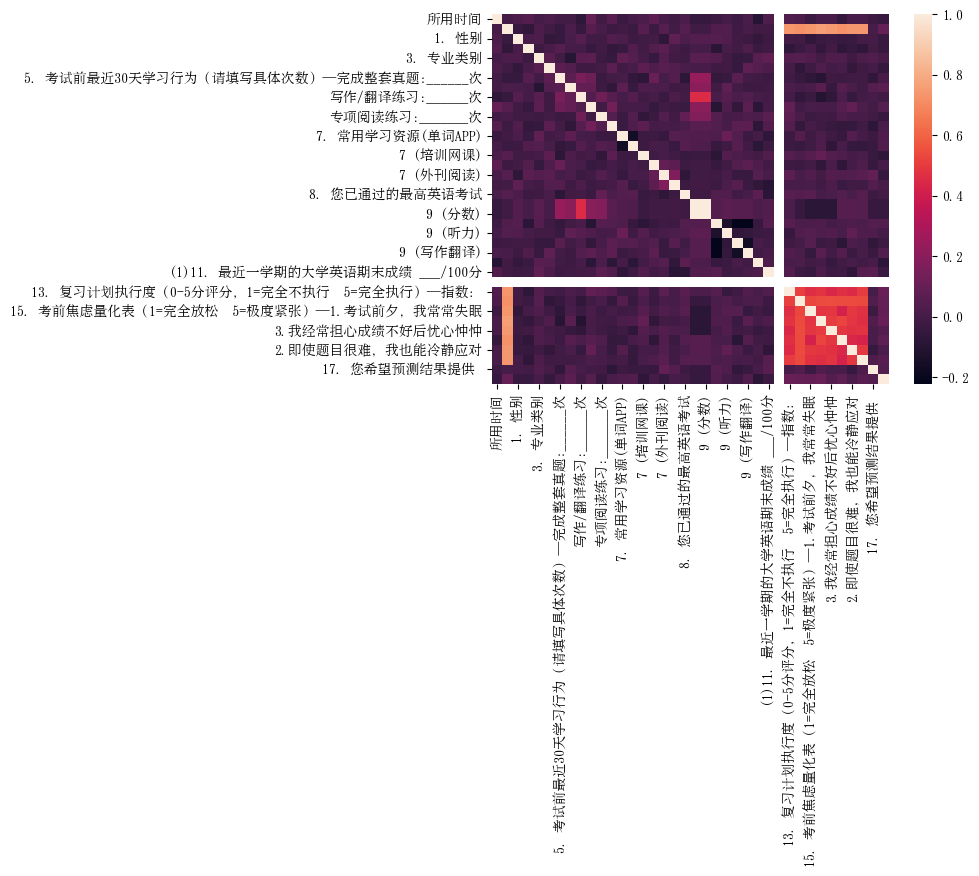

In [15]:
relationships = sns.heatmap(numerical_df.corr())
relationships

In [16]:
# check highly correlated columns (white spots)
numerical_df.corr()

,所用时间,总分,1. 性别,2. 年级,3. 专业类别,(1)4. 高考英语具体分数 ___/150分 （请尽量准确填写）,5. 考试前最近30天学习行为（请填写具体次数）—完成整套真题:______次,专项听力训练:______次,写作/翻译练习:______次,APP单词学习:______次（如百词斩、扇贝等）,专项阅读练习:_______次,6. 日均英语学习时长,7. 常用学习资源(单词APP),7 (真题库),7 (培训网课),7 (英文影视),7 (外刊阅读),7 (其他),8. 您已通过的最高英语考试,9. 最近模拟考成绩（如未参加可跳过）（请全部勾选之后在填写成绩，请大致准确填写您最近的成绩）(项目),9 (分数),9 (总分),9 (听力),9 (阅读),9 (写作翻译),10. 词汇量自评,(1)11. 最近一学期的大学英语期末成绩 ___/100分,12.为了确保问卷质量，请本项选择【有时】,13. 复习计划执行度（0-5分评分，1=完全不执行 5=完全执行）—指数：,14. 模考分数波动范围（历史波动）,15. 考前焦虑量化表（1=完全放松 5=极度紧张）—1.考试前夕，我常常失眠,2.在考场上，我经常会大脑一片空白,3.我经常担心成绩不好后忧心忡忡,16.学习自我效能感量表（5分评分制，1=完全不能，5=完全可以）—1.我相信通过努力学习，我能通过四/六级考试,2.即使题目很难，我也能冷静应对,3.我有能力我完成考试中的写作任务,17. 您希望预测结果提供,18. 是否同意用于模型训练?
所用时间,1.000000,-0.000469,0.023909,0.041687,-0.001264,0.016342,-0.004856,-0.007204,-0.074930,0.095741,-0.012595,0.053784,-0.032875,0.000248,0.016534,0.071457,0.009226,-0.011847,0.018615,-0.050061,-0.050061,-0.028395,-0.001096,-2.255535e-02,0.011946,-0.102183,0.028640,NaN,0.032045,2.472282e-02,-0.022787,0.009732,0.010667,-0.052901,0.009433,0.010766,-0.026309,-0.042145
总分,-0.000469,1.000000,-0.040120,-0.061868,0.024666,-0.013078,-0.049126,0.018844,-0.045225,0.050176,0.010736,-0.026092,-0.009109,-0.033924,0.050718,-0.024198,0.048716,-0.006823,0.046784,-0.016393,-0.016393,0.030886,0.035714,-1.790008e-02,0.008454,-0.012034,-0.009811,NaN,0.732629,7.196996e-01,0.735753,0.758918,0.745899,0.726513,0.740987,0.740678,0.003581,0.093305
1. 性别,0.023909,-0.040120,1.000000,0.015264,0.024882,-0.056992,-0.050767,0.012508,0.045103,-0.014371,-0.016396,0.030400,0.020057,-0.027433,-0.016237,-0.006100,-0.070561,0.073755,0.023147,0.042486,0.042486,0.045172,0.032217,-8.859419e-03,-0.030931,-0.056769,-0.026624,NaN,-0.005065,-1.112491e-02,-0.061210,-0.033410,-0.027904,-0.041173,-0.040263,0.000659,0.000128,-0.038526
2. 年级,0.041687,-0.061868,0.015264,1.000000,-0.027218,0.008474,0.045140,-0.002428,-0.003115,-0.042916,-0.017449,-0.059109,-0.039180,0.032037,-0.010766,0.037564,0.064512,-0.003128,-0.031441,0.005525,0.005525,-0.083941,0.003301,-1.257742e-02,0.027306,-0.034234,-0.019781,NaN,-0.071952,-3.642423e-02,-0.000604,-0.057294,-0.010139,-0.065634,-0.046153,-0.068509,-0.006217,-0.036927
3. 专业类别,-0.001264,0.024666,0.024882,-0.027218,1.000000,0.063442,-0.004987,-0.095400,0.061242,0.065685,-0.030521,-0.050428,0.080643,0.044829,0.000546,-0.049371,0.042688,-0.008638,-0.019037,0.061798,0.061798,0.043385,-0.009757,-5.009848e-02,-0.039347,0.054645,0.081887,NaN,0.042455,4.698425e-02,0.029742,-0.003764,0.029545,0.028815,-0.020957,0.022932,0.032467,0.007109
(1)4. 高考英语具体分数 ___/150分 （请尽量准确填写）,0.016342,-0.013078,-0.056992,0.008474,0.063442,1.000000,0.067749,0.038714,-0.018854,-0.021868,-0.004457,0.064855,-0.010461,0.001694,0.069155,0.026454,0.057551,0.039023,0.013131,0.010557,0.010557,-0.021325,-0.011474,-4.919606e-02,0.073221,0.048834,0.022646,NaN,0.001230,-6.569221e-02,-0.018666,0.026043,-0.006986,0.007318,-0.057288,-0.018556,0.000241,-0.055578
5. 考试前最近30天学习行为（请填写具体次数）—完成整套真题:______次,-0.004856,-0.049126,-0.050767,0.045140,-0.004987,0.067749,1.000000,0.064392,0.153877,0.114313,-0.035518,-0.007800,0.006234,-0.056717,-0.078129,0.102274,0.003760,0.040816,-0.076538,0.235706,0.235706,-0.054091,-0.037354,5.417050e-02,-0.007217,-0.014535,-0.027221,NaN,-0.013961,-4.550469e-02,-0.070224,-0.091931,-0.019481,-0.029937,-0.013890,-0.015511,-0.065225,0.008719
专项听力训练:______次,-0.007204,0.018844,0.012508,-0.002428,-0.095400,0.038714,0.064392,1.000000,0.085746,0.092112,-0.030205,-0.063238,0.069686,-0.038568,0.022150,0.019214,0.017117,-0.021408,-0.009211,0.208534,0.208534,-0.013386,0.076907,-4.954305e-03,-0.029508,-0.025152,-0.014643,NaN,0.016625,6.234323e-04,0.014594,0.061454,-0.044857,0.052278,0.014656,-0.016299,0.045905,0.064112
写作/翻译练习:______次,-0.074930,-0.045225,0.045103,-0.003115,0.061242,-0.018854,0.153877,0.085746,1.000000,0.038954,0.116561,0.050009,0.001758,0.042037,-0.008749,0.002505,-0.032449,0.024612,-0.004017,0.451129,0.451129,0.015713,0.050556,1.651632e-02,0.039416,0.003761,-0.004700,NaN,0.000908,-6.243846e-02,-0.034139

In [17]:
# since it is NaN, drop this column as well
numerical_df.drop('12.为了确保问卷质量，请本项选择【有时】', axis=1, inplace=True)

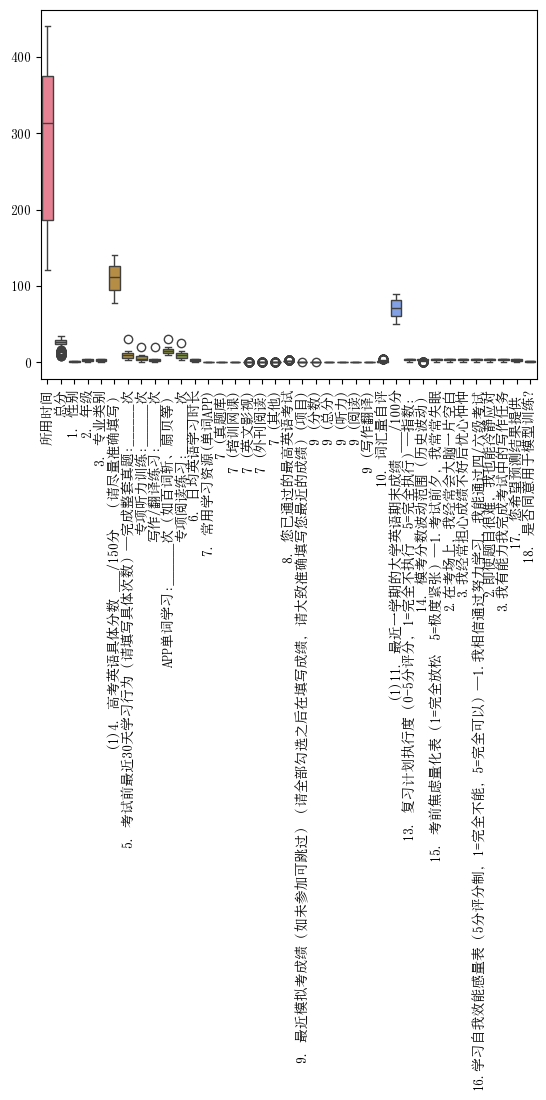

In [18]:
sns.boxplot(numerical_df)
plt.xticks(rotation = 90)
plt.show()

In [19]:
# standardization and check boxplot again
from sklearn.preprocessing import RobustScaler, StandardScaler, Normalizer, MinMaxScaler
standard = StandardScaler()
standard_df = standard.fit_transform(numerical_df)

rs = RobustScaler()
rs_df = rs.fit_transform(numerical_df)

norm = Normalizer()
norm_df = norm.fit_transform(numerical_df)

mm = MinMaxScaler()
mm_df = mm.fit_transform(numerical_df)


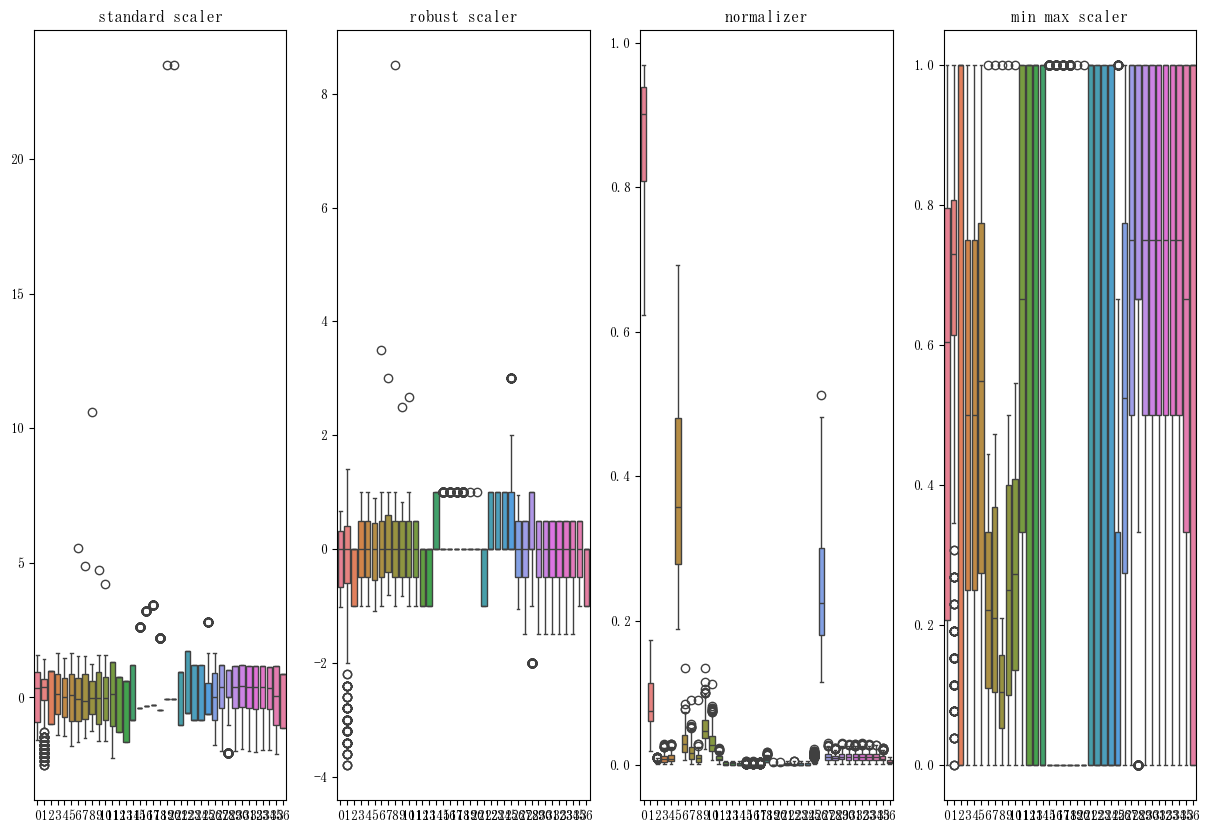

In [20]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize =(15,10))

sns.boxplot(standard_df, ax=axs[0])
axs[0].set_title('standard scaler')

sns.boxplot(rs_df, ax=axs[1])
axs[1].set_title('robust scaler')

sns.boxplot(norm_df, ax=axs[2])
axs[2].set_title('normalizer')

sns.boxplot(mm_df, ax = axs[3])
axs[3].set_title('min max scaler')

fig.show()


* based on the complexity of dealing with outliers, I think normalizer does the best job among the four because outliers are not extreme.

### Regression based on 总分

In [21]:
from sklearn.model_selection import train_test_split
y = numerical_df['总分']
X = numerical_df.drop('总分', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
from sklearn.svm import SVR

pipe_log = Pipeline([
    ('scaler', Normalizer()),
    ('logreg', LogisticRegression())
])

pipe_rf = Pipeline([
    ('scaler', Normalizer()),
    ('random forest', RandomForestRegressor(max_depth=4, random_state=10))
])

# cannot use xgb because of python 3.13 does not support one of its dependencies.(libomp)
# pipe_xgb = Pipeline([
#     ('scaler', Normalizer()),
#     ('xgb', XGBRegressor(learning_rate = 0.1, random_state = 10, n_estimators = 100))
# ])

pipe_svm = Pipeline([
    ('scaler', Normalizer()),
    ('svr', SVR())
])



In [23]:
pipe_log.fit(X_train, y_train)
log_pred = pipe_log.predict(X_test)
log_pred_train = pipe_log.predict(X_train)

pipe_rf.fit(X_train, y_train)
rf_pred = pipe_rf.predict(X_test)
rf_pred_train = pipe_rf.predict(X_train)

pipe_svm.fit(X_train, y_train)
svm_pred = pipe_svm.predict(X_test)
svm_pred_train = pipe_svm.predict(X_train)

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score 

# check performance
rmse_log_train = root_mean_squared_error(y_train, log_pred_train)
rmse_rf_train = root_mean_squared_error(y_train, rf_pred_train)
rmse_svm_train = root_mean_squared_error(y_train, svm_pred_train)

r2_log_train = r2_score(y_train, log_pred_train)
r2_rf_train = r2_score(y_train, rf_pred_train)
r2_svm_train = r2_score(y_train, svm_pred_train)

print(f'logit rmse: {rmse_log_train}, logit r-squared: {r2_log_train}')
print(f'random forest rmse: {rmse_rf_train}, random forest r-squared: {r2_rf_train}')
print(f'svm rmse: {rmse_svm_train}, svm r-squared: {r2_svm_train}')



logit rmse: 7.304154895197094, logit r-squared: -0.26204685536338923
random forest rmse: 2.0107883866862166, random forest r-squared: 0.9043536796656467
svm rmse: 6.862775099932244, svm r-squared: -0.11412793549684119


In [26]:
# based on the status from performance check, random forest model is the best among three.
# now neec to check if model is overfitting

rmse_rf = root_mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print(f'Training: \nrf rmse: {rmse_rf_train}, rf r-squared: {r2_rf_train}')
print(f'Test set: \nrf rmse: {rmse_rf}, rf r-squared: {r2_rf}')

Training: 
rf rmse: 2.0107883866862166, rf r-squared: 0.9043536796656467
Test set: 
rf rmse: 2.5227891734283037, rf r-squared: 0.8615907767345862


* based on the comparison of rmse and r2 of rf model, the model has an issue of overfitting. Therefore, the next step is deal with the issue. 

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [2,3]
}

rf_search = GridSearchCV(RandomForestRegressor(random_state=10), param_grid=param_grid, cv = 5)
rf_search.fit(X_train, y_train)
rf_search_pred = rf_search.predict(X_test)


rmse_search = root_mean_squared_error(y_test, rf_search_pred)
r2_search = r2_score(y_test, rf_search_pred)

print(f'rf search rmse: {rmse_search}, rf search r-squared: {r2_search}')


rf search rmse: 1.9892394589699018, rf search r-squared: 0.9139447748587274


* nice! the rmse has reduced and r2 has increased from roughly 86% to 91%

In [30]:
# check the best params of the model
print(rf_search.best_params_)
print(rf_search.best_score_)

{'max_depth': 3, 'n_estimators': 100}
0.9109309167212828
